<a href="https://colab.research.google.com/github/SurvivalXUdit007/LGMVIP-DataScience/blob/main/irisflower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LGM DATA SCIENCE INTERNSHIP - TASK-1(BEGINNER LEVEL) By -Y Udit Kumar**


***Iris Flowers Classification ML Project :***

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

# **LIBRARIES**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
data=pd.read_csv("iris.csv")

# **Understanding the data **

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3    petal_width  150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data. describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:

data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [12]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,iris_virginica
146,6.3,2.5,5.0,1.9,iris_virginica
147,6.5,3.0,5.2,2.0,iris_virginica
148,6.2,3.4,5.4,2.3,iris_virginica
149,5.9,3.0,5.1,1.8,iris_virginica


In [13]:
data=data.replace(to_replace={'class':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [14]:
data['class'] = data['class'].astype('category').cat.codes

# **Explantory data analysis**

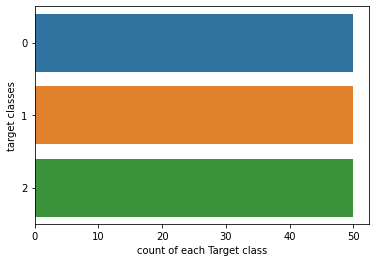

In [15]:
sns.countplot(y=data['class'],data=data)
plt.ylabel('target classes')
plt.xlabel('count of each Target class')
plt.show()

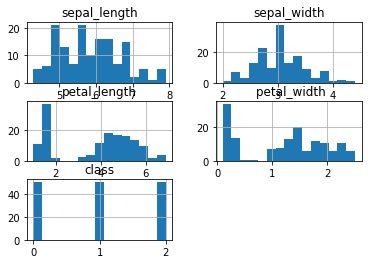

In [16]:
data.hist(bins=15)
plt.title('Featue distibution')
plt.show()

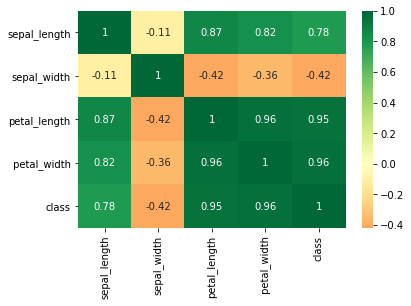

In [17]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',center=0)

# **Model building**

In [18]:
data = data.sample(frac = 1)
data. head()

,sepal_length,sepal_width,petal_length,petal_width,class
33,5.5,4.2,1.4,0.2,0
141,6.9,3.1,5.1,2.3,2
0,5.1,3.5,1.4,0.2,0
135,7.7,3.0,6.1,2.3,2
79,5.7,2.6,3.5,1.0,1


In [19]:
x = data.drop(['class'], axis =1)
y = data['class']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# **Logistic regression**

In [23]:
#Create an instance and fit the model
reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')

#Fitting the train and test data
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred = reg.predict(x_test)
y_proba = reg.predict_proba(x_test)
y_pred

array([2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0,
       1], dtype=int8)

In [25]:
score_lr= reg.score(x_test,y_test)
print(score_lr)

1.0


In [26]:
actual=y_test
predicted=y_pred
results=confusion_matrix(actual,predicted)
print('confusion matrix')
print(results)

confusion matrix
[[15  0  0]
 [ 0 17  0]
 [ 0  0 13]]


# **SVM**

In [27]:

clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
print ("Train - Accuracy :", accuracy_score(y_train, clf.predict(x_train)))
print ("Train - Confusion matrix :\n",confusion_matrix(y_train, clf.
predict(x_train)))

Train - Accuracy : 0.9809523809523809
Train - Confusion matrix :
 [[35  0  0]
 [ 0 32  1]
 [ 0  1 36]]


In [29]:
print ("Test - Accuracy :", accuracy_score(y_test, clf.predict
(x_test)))
print ("Test - Confusion matrix :\n",confusion_matrix(y_test, clf.
predict(x_test)))

Test - Accuracy : 1.0
Test - Confusion matrix :
 [[15  0  0]
 [ 0 17  0]
 [ 0  0 13]]


# **Prediction on given input**

In [30]:
num=[[6.4,2.9,4.3,1.3]]
num

[[6.4, 2.9, 4.3, 1.3]]

In [31]:
num=sc.fit_transform(num)

In [32]:
u=clf.predict(num)
u[0]

0

In [33]:

rslt = reg.predict(num)
rslt[0]

0